<a href="https://colab.research.google.com/github/amirmassoud99/TorchTrain/blob/main/Training_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# prompt: create a network class with input, h1, h2 and output layers. Fully connected with 8 nodes. Input has 4 nodes and output has 3 nodes

import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [5]:
torch.manual_seed(41)
#Instantiate model
model = Model()

In [7]:
# prompt: import plot functionality and inline plotting

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
# prompt: read a csv data base from this url: https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

import pandas as pd
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
print(df.head())


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [16]:
# prompt: replace the last column with numbers for each variety

# Replace the last column with numbers for each variety
variety_mapping = {'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0}
df['variety'] = df['variety'].map(variety_mapping)

print(df.head())


   sepal.length  sepal.width  petal.length  petal.width  variety
0           5.1          3.5           1.4          0.2      0.0
1           4.9          3.0           1.4          0.2      0.0
2           4.7          3.2           1.3          0.2      0.0
3           4.6          3.1           1.5          0.2      0.0
4           5.0          3.6           1.4          0.2      0.0


In [23]:
# prompt: remove the variety and split the data in df to create a training set

from sklearn.model_selection import train_test_split

# Assuming df is already defined and preprocessed as in the previous code

# Separate features (X) and target variable (y)
X = df.drop('variety', axis=1).values
y = df['variety'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for your model
# Example usage:
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)


In [27]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [42]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    #if i % 10 == 0:
    #  print(f'Epoch: {i} Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.015638377517461777
Epoch: 10 Loss: 0.015297781676054
Epoch: 20 Loss: 0.01496267318725586
Epoch: 30 Loss: 0.01463285181671381
Epoch: 40 Loss: 0.014308099634945393
Epoch: 50 Loss: 0.01398822758346796
Epoch: 60 Loss: 0.013673180714249611
Epoch: 70 Loss: 0.013362829573452473
Epoch: 80 Loss: 0.013057163916528225
Epoch: 90 Loss: 0.012756051495671272
Epoch: 100 Loss: 0.0124594671651721
Epoch: 110 Loss: 0.012167633511126041
Epoch: 120 Loss: 0.011880612932145596
Epoch: 130 Loss: 0.011598150245845318
Epoch: 140 Loss: 0.011320208199322224
Epoch: 150 Loss: 0.01104672159999609
Epoch: 160 Loss: 0.010777892544865608
Epoch: 170 Loss: 0.010513733141124249
Epoch: 180 Loss: 0.01025431975722313
Epoch: 190 Loss: 0.009999739937484264
Epoch: 200 Loss: 0.009750038385391235
Epoch: 210 Loss: 0.009505449794232845
Epoch: 220 Loss: 0.00926629826426506
Epoch: 230 Loss: 0.009032060392200947
Epoch: 240 Loss: 0.008802789263427258
Epoch: 250 Loss: 0.008578433655202389
Epoch: 260 Loss: 0.008359045721590

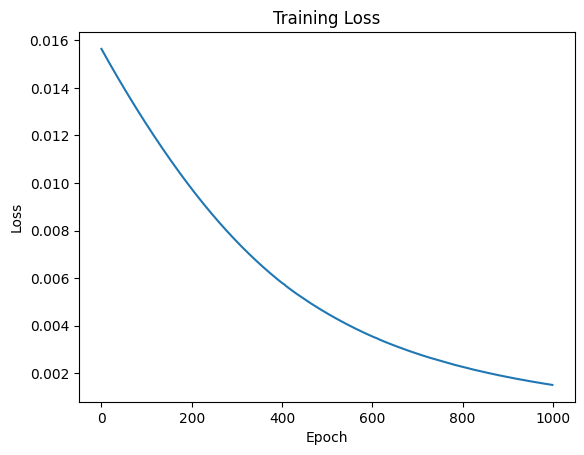

In [43]:
# prompt: plot the loss



plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [50]:
# prompt: validate model on the test data set

with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
print(f'{loss=}')
y_eval = torch.argmax(y_eval, dim=1)
#print(f'{y_eval=}')
#y_test

loss=tensor(0.5746)
y_eval=tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])


tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

In [53]:
#Testing with a new data point
new_iris = torch.tensor([4.7,3.3, 1.3, 0.7])

In [55]:
with torch.no_grad():
    prediction = model.forward(new_iris)
    print(f'{prediction=}')


prediction=tensor([ 51.6667,  42.7994, -78.6533])
